In [1]:
import pandas as pd
import numpy as np
import os
import glob
from itertools import combinations
from collections import defaultdict
from random import sample
import random
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_theme(style="whitegrid")
#pandas max row

In [2]:
def calculate_area_between_two_lines(df):
    area_unimportant = np.trapz(df[(df['exp_type']=='unimportant')].test_accuracy, df[(df['exp_type']=='unimportant')].feature_order)
    area_important = np.trapz(df[(df['exp_type']=='important')].test_accuracy, df[(df['exp_type']=='important')].feature_order)
    area_between = area_unimportant - area_important
    print(f"Area between unimportant and important: {area_between}")
    return area_between

# Gilon Activity

In [3]:
gilon_gradientshap_lstm = pd.read_csv('dataset/benchmark/gilon_activity_drop/GradientShap_gilon_activity_lstm.csv')
gilon_featureablation_lstm = pd.read_csv('dataset/benchmark/gilon_activity_drop/FeatureAblation_gilon_activity_lstm.csv')
gilon_integratedgradients_lstm = pd.read_csv('dataset/benchmark/gilon_activity_drop/IntegratedGradients_gilon_activity_lstm.csv')
gilon_saliency_lstm = pd.read_csv('dataset/benchmark/gilon_activity_drop/Saliency_gilon_activity_lstm.csv')
gilon_shapleyvaluesampling = pd.read_csv('dataset/benchmark/gilon_activity_drop/ShapleyValueSampling_gilon_activity_lstm.csv')
gilon_fit_lstm = pd.read_csv('dataset/benchmark/gilon_activity_drop/FIT_gilon_activity_lstm.csv')
gilon_dyna_lstm = pd.read_csv('dataset/benchmark/gilon_activity_drop/DynaMask_gilon_activity_lstm.csv')

gilon_gradientshap_tcn = pd.read_csv('dataset/benchmark/gilon_activity_drop/GradientShap_gilon_activity_tcn.csv')
gilon_featureablation_tcn = pd.read_csv('dataset/benchmark/gilon_activity_drop/FeatureAblation_gilon_activity_tcn.csv')
gilon_integratedgradients_tcn = pd.read_csv('dataset/benchmark/gilon_activity_drop/IntegratedGradients_gilon_activity_tcn.csv')
gilon_saliency_tcn = pd.read_csv('dataset/benchmark/gilon_activity_drop/Saliency_gilon_activity_tcn.csv')
gilon_shapleyvaluesampling_tcn = pd.read_csv('dataset/benchmark/gilon_activity_drop/ShapleyValueSampling_gilon_activity_tcn.csv')
gilon_dyna_tcn = pd.read_csv('dataset/benchmark/gilon_activity_drop/DynaMask_gilon_activity_tcn.csv')

gilon_laxcat = pd.read_csv('dataset/benchmark/gilon_activity_drop/laxcat_gilon_activity_laxcat.csv')

In [4]:
gilon_integratedgradients_tcn.groupby(['project_name','exp_type']).mean()

/tmp/ipykernel_233118/3634685322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gilon_integratedgradients_tcn.groupby(['project_name','exp_type']).mean()


,,test_loss,test_accuracy,cv_num,exp_num,featuer_len,feature_order
project_name,exp_type,,,,,,
gilon_activity_tcn_EXP1002,base,0.247964,0.927782,2.0,1002.0,14.0,0.0
gilon_activity_tcn_EXP2410,important,0.158351,0.950753,2.0,2410.0,13.0,1.0
gilon_activity_tcn_EXP2411,important,0.227177,0.926283,2.0,2411.0,12.0,2.0
gilon_activity_tcn_EXP2412,important,0.264613,0.906464,2.0,2412.0,11.0,3.0
gilon_activity_tcn_EXP2413,important,0.321199,0.874515,2.0,2413.0,10.0,4.0
gilon_activity_tcn_EXP2414,important,0.322261,0.869305,2.0,2414.0,9.0,5.0
gilon_activity_tcn_EXP2415,important,0.301021,0.878367,2.0,2415.0,8.0,6.0
gilon_activity_tcn_EXP2416,important,0.319183,0.886168,2.0,2416.0,7.0,7.0
gilon_activity_tcn_EXP2417,important,0.297210,0.888199,2.0,2417.0,6.0,8.0


In [5]:
all_results_dict = {
    0: [gilon_gradientshap_lstm,'GradientShap'],
    1: [gilon_featureablation_lstm,'FeatureAblation'],
    2: [gilon_integratedgradients_lstm,'IntegratedGradients'],
    3: [gilon_saliency_lstm,'Saliency'],
    4: [gilon_shapleyvaluesampling,'ShapleyValueSampling'],

    5: [gilon_gradientshap_tcn,'GradientShap'],
    6: [gilon_featureablation_tcn,'FeatureAblation'],
    7: [gilon_integratedgradients_tcn,'IntegratedGradients'],
    8: [gilon_saliency_tcn,'Saliency'],
    9: [gilon_shapleyvaluesampling_tcn,'ShapleyValueSampling'],

    10: [gilon_laxcat,'Laxcat'],
    11: [gilon_fit_lstm,'FIT'],
    12: [gilon_dyna_lstm,'DynaMask'],
    13: [gilon_dyna_tcn,'DynaMask'],
}

In [6]:
area_df = []
for i in range(len(all_results_dict)):
    name = all_results_dict[i][1]
    grouped = all_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
    area_df.append([name, calculate_area_between_two_lines(grouped)])
area_df = pd.DataFrame(area_df, columns=['name','area'])
area_df


Area between unimportant and important: 0.33051334127039667
Area between unimportant and important: 0.1152181525316891
Area between unimportant and important: 0.32947685412143635
Area between unimportant and important: -0.7569927866097057
Area between unimportant and important: 0.0971776735065486
Area between unimportant and important: 0.6031024581553339
Area between unimportant and important: 0.23612297779956393
Area between unimportant and important: 0.6206737166468237
Area between unimportant and important: 0.5018768821345994
Area between unimportant and important: 0.16281952517683074
Area between unimportant and important: -0.5818334617270118
Area between unimportant and important: 0.2275579522375537
Area between unimportant and important: 0.20996568387141856
Area between unimportant and important: -0.27715526297359716


/tmp/ipykernel_233118/1455247835.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = all_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_233118/1455247835.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = all_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_233118/1455247835.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = all_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_233118/1455247835.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will b

,name,area
0,GradientShap,0.330513
1,FeatureAblation,0.115218
2,IntegratedGradients,0.329477
3,Saliency,-0.756993
4,ShapleyValueSampling,0.097178
5,GradientShap,0.603102
6,FeatureAblation,0.236123
7,IntegratedGradients,0.620674
8,Saliency,0.501877
9,ShapleyValueSampling,0.162820


In [7]:
# area_df = []
# for i in range(len(all_results_dict)):
#     name = all_results_dict[i][1]
#     area_df.append([name, calculate_area_between_two_lines(all_results_dict[i][0])])
# area_df = pd.DataFrame(area_df, columns=['name','area'])
# area_df


# For Paper

Area between unimportant and important: 0.24245395335807984
Area between unimportant and important: 0.09794103228517415
Area between unimportant and important: 0.24059808109811698
Area between unimportant and important: -0.6804398067091544
Area between unimportant and important: -0.0529098676377906
Area between unimportant and important: 0.28534911408362085


/tmp/ipykernel_233118/675722752.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


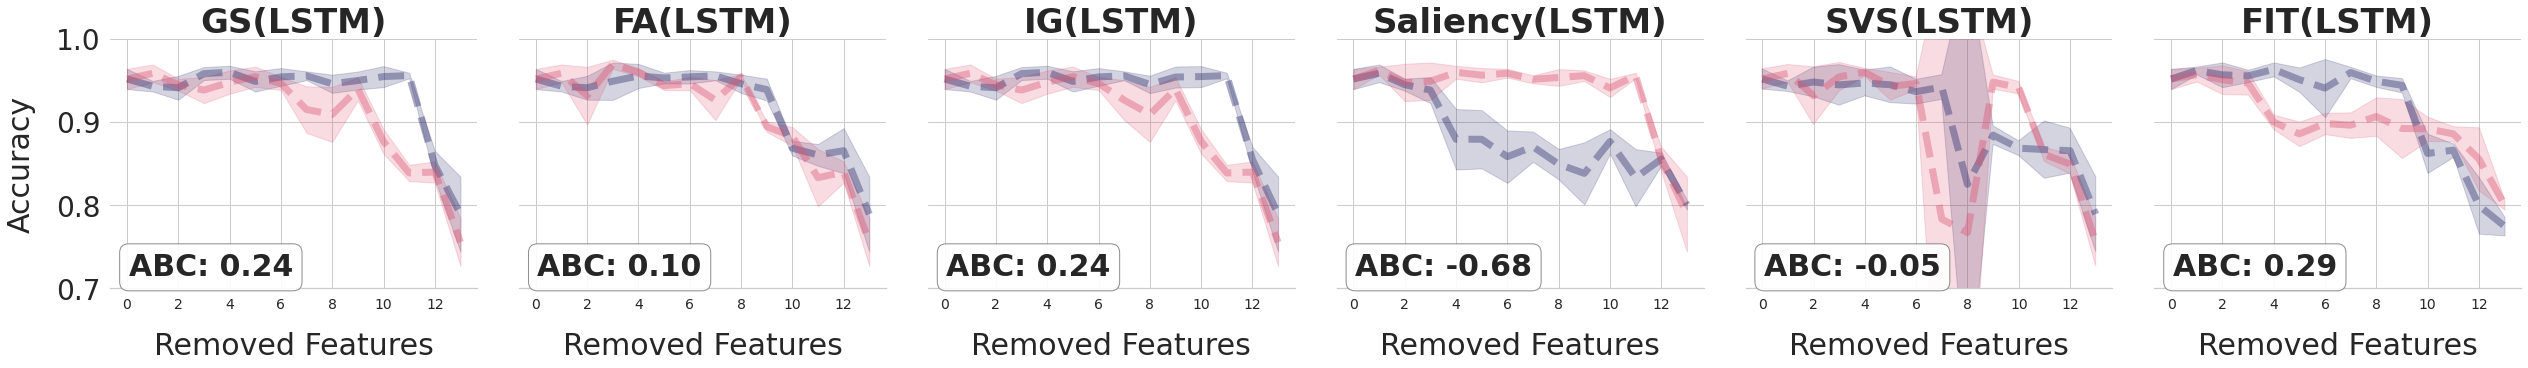

In [8]:
fig, axes = plt.subplots(1, 6, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 34 
linewidth= 7
alpha=0.4

first_idx = 0
second_idx = 1
third_idx = 2
fourth_idx = 3
fifth_idx = 4
sixth_idx = 11

sns.lineplot(data=all_results_dict[first_idx][0][(all_results_dict[first_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[first_idx][0][(all_results_dict[first_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[second_idx][0][(all_results_dict[second_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[second_idx][0][(all_results_dict[second_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[third_idx][0][(all_results_dict[third_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[third_idx][0][(all_results_dict[third_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fourth_idx][0][(all_results_dict[fourth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fourth_idx][0][(all_results_dict[fourth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fifth_idx][0][(all_results_dict[fifth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fifth_idx][0][(all_results_dict[fifth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[sixth_idx][0][(all_results_dict[sixth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[sixth_idx][0][(all_results_dict[sixth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# remove y tick for axes[1]
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])

# remove label
axes[0].set_ylabel('Accuracy', fontsize=30, labelpad=20)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

for i in range(6):
    axes[i].grid(True)
    axes[i].set_xlabel('Removed Features', fontsize=30, labelpad=20)
    # axes[i].legend(title='', loc='lower left', fontsize=12, )
    axes[i].set_ylim(0.7, 1.0)
    axes[i].spines[["top"]].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    # set x ticks
    axes[i].set_xticks([0, 2,  4,  6, 8, 10, 12])

area_between_0 = calculate_area_between_two_lines(all_results_dict[first_idx][0])
area_between_1 = calculate_area_between_two_lines(all_results_dict[second_idx][0])
area_between_2 = calculate_area_between_two_lines(all_results_dict[third_idx][0])
area_between_3 = calculate_area_between_two_lines(all_results_dict[fourth_idx][0])
area_between_4 = calculate_area_between_two_lines(all_results_dict[fifth_idx][0])
area_between_5 = calculate_area_between_two_lines(all_results_dict[sixth_idx][0])

area_between = [area_between_0, area_between_1, area_between_2, area_between_3, area_between_4, area_between_5]

title_lists = ['GS(LSTM)', 'FA(LSTM)','IG(LSTM)','Saliency(LSTM)','SVS(LSTM)', 'FIT(LSTM)', ]

for i in range(6):
    axes[i].set_title(title_lists[i], fontsize=title_font_size, fontweight='bold')
    # remove legend
    axes[i].legend().remove()
    axes[i].annotate(f"ABC: {area_between[i]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=30, fontweight='bold',
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))

    axes[i].set_yticks([0.7, 0.8, 0.9, 1.0], fontsize=22)
    if i ==0:
        axes[i].set_yticklabels([0.7, 0.8, 0.9, 1.0], fontsize=28)
    axes[i].spines[["top", "right", "left"]].set_visible(False)
plt.tight_layout()
plt.savefig('results/baseline/gilon_activity_lstm1_captum.png', dpi=300)

Area between unimportant and important: 0.35398137124448503
Area between unimportant and important: 0.5554310525947201
Area between unimportant and important: 0.23023320960851557
Area between unimportant and important: 0.6658729602913365
Area between unimportant and important: 0.5281882484767859
Area between unimportant and important: 0.11261292807619583


/tmp/ipykernel_233118/2880897694.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


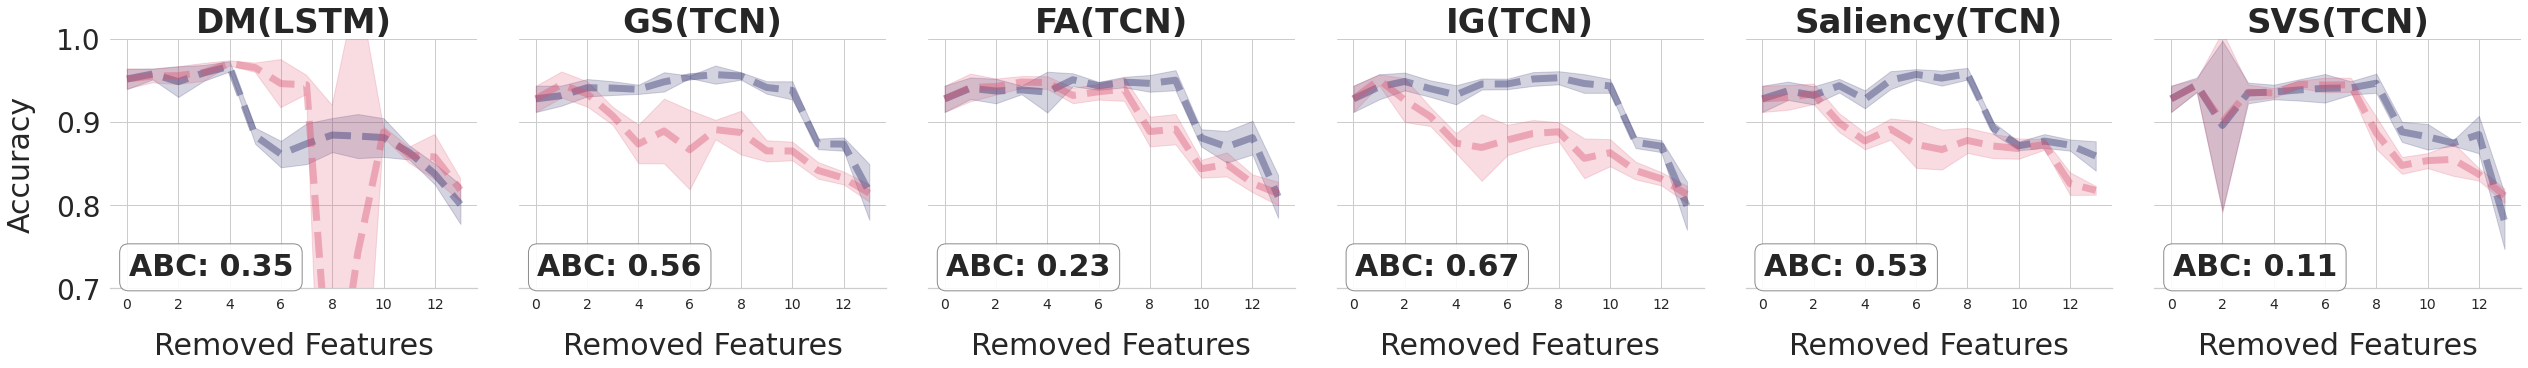

In [9]:
fig, axes = plt.subplots(1, 6, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 34 
linewidth= 7
alpha=0.4

first_idx = 12
second_idx = 5
third_idx = 6
fourth_idx = 7
fifth_idx = 8
sixth_idx = 9

sns.lineplot(data=all_results_dict[first_idx][0][(all_results_dict[first_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[first_idx][0][(all_results_dict[first_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[second_idx][0][(all_results_dict[second_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[second_idx][0][(all_results_dict[second_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[third_idx][0][(all_results_dict[third_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[third_idx][0][(all_results_dict[third_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fourth_idx][0][(all_results_dict[fourth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fourth_idx][0][(all_results_dict[fourth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fifth_idx][0][(all_results_dict[fifth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[fifth_idx][0][(all_results_dict[fifth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[sixth_idx][0][(all_results_dict[sixth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[sixth_idx][0][(all_results_dict[sixth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# remove y tick for axes[1]
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])

# remove label
axes[0].set_ylabel('Accuracy', fontsize=30, labelpad=20)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

for i in range(6):
    axes[i].grid(True)
    axes[i].set_xlabel('Removed Features', fontsize=30, labelpad=20)
    # axes[i].legend(title='', loc='lower left', fontsize=12, )
    axes[i].set_ylim(0.7, 1.0)
    axes[i].spines[["top"]].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    # set x ticks
    axes[i].set_xticks([0, 2,  4,  6, 8, 10, 12])

area_between_0 = calculate_area_between_two_lines(all_results_dict[first_idx][0])
area_between_1 = calculate_area_between_two_lines(all_results_dict[second_idx][0])
area_between_2 = calculate_area_between_two_lines(all_results_dict[third_idx][0])
area_between_3 = calculate_area_between_two_lines(all_results_dict[fourth_idx][0])
area_between_4 = calculate_area_between_two_lines(all_results_dict[fifth_idx][0])
area_between_5 = calculate_area_between_two_lines(all_results_dict[sixth_idx][0])

area_between = [area_between_0, area_between_1, area_between_2, area_between_3, area_between_4, area_between_5]

title_lists = ['DM(LSTM)','GS(TCN)', 'FA(TCN)','IG(TCN)','Saliency(TCN)','SVS(TCN)',  ]

for i in range(6):
    axes[i].set_title(title_lists[i], fontsize=title_font_size, fontweight='bold')
    # remove legend
    axes[i].legend().remove()
    axes[i].annotate(f"ABC: {area_between[i]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=30, fontweight='bold',
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))

    axes[i].set_yticks([0.7, 0.8, 0.9, 1.0], fontsize=22)
    if i ==0:
        axes[i].set_yticklabels([0.7, 0.8, 0.9, 1.0], fontsize=28)
    axes[i].spines[["top", "right", "left"]].set_visible(False)
plt.tight_layout()
plt.savefig('results/baseline/gilon_activity_lstm2_captum.png', dpi=300)

Area between unimportant and important: -0.2800266125078785
Area between unimportant and important: -0.45840044821065895


/tmp/ipykernel_233118/3665636683.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


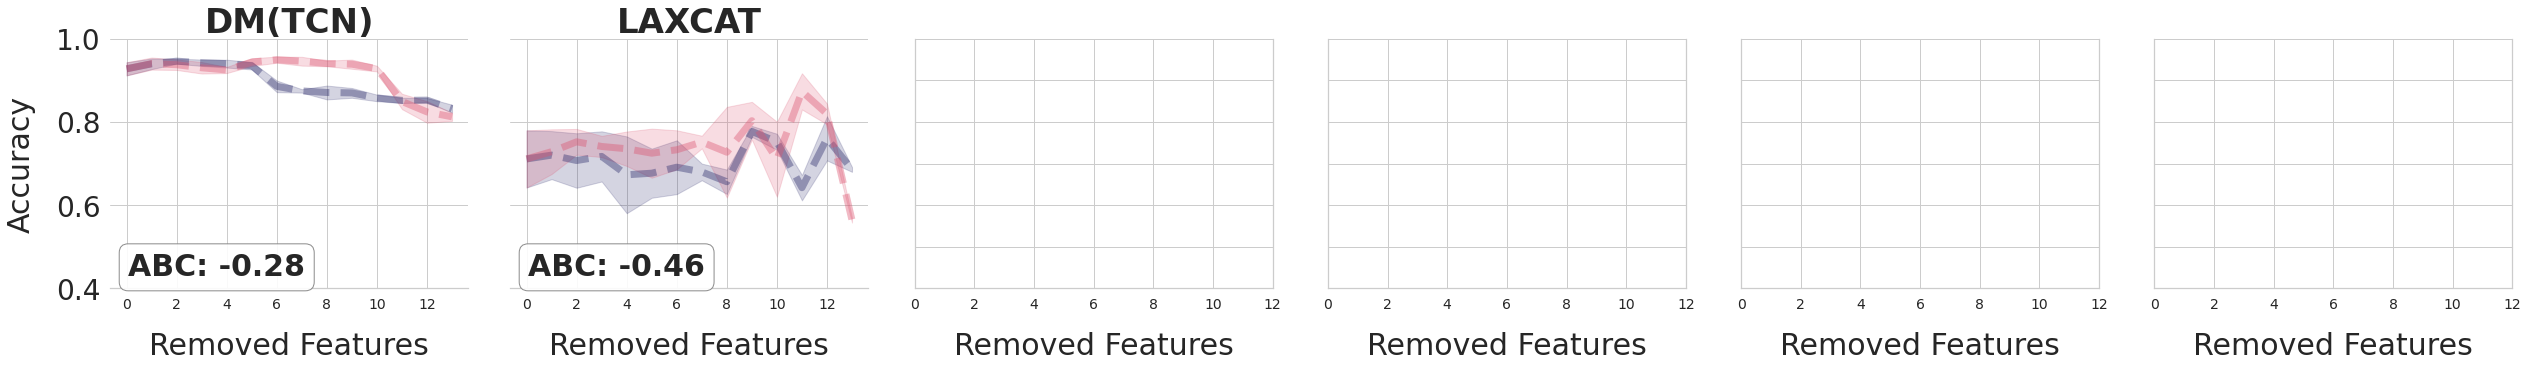

In [10]:
fig, axes = plt.subplots(1, 6, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 34 
linewidth= 7
alpha=0.4

first_idx = 13
second_idx = 10
third_idx = 6
fourth_idx = 7
fifth_idx = 8
sixth_idx = 9

sns.lineplot(data=all_results_dict[first_idx][0][(all_results_dict[first_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[first_idx][0][(all_results_dict[first_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[second_idx][0][(all_results_dict[second_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=all_results_dict[second_idx][0][(all_results_dict[second_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[third_idx][0][(all_results_dict[third_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[third_idx][0][(all_results_dict[third_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[fourth_idx][0][(all_results_dict[fourth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[fourth_idx][0][(all_results_dict[fourth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[fifth_idx][0][(all_results_dict[fifth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[fifth_idx][0][(all_results_dict[fifth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[sixth_idx][0][(all_results_dict[sixth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=all_results_dict[sixth_idx][0][(all_results_dict[sixth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# remove y tick for axes[1]
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])

# remove label
axes[0].set_ylabel('Accuracy', fontsize=30, labelpad=20)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

for i in range(6):
    axes[i].grid(True)
    axes[i].set_xlabel('Removed Features', fontsize=30, labelpad=20)
    # axes[i].legend(title='', loc='lower left', fontsize=12, )
    axes[i].set_ylim(0.7, 1.0)
    axes[i].spines[["top"]].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    # set x ticks
    axes[i].set_xticks([0, 2,  4,  6, 8, 10, 12])

area_between_0 = calculate_area_between_two_lines(all_results_dict[first_idx][0])
area_between_1 = calculate_area_between_two_lines(all_results_dict[second_idx][0])
# area_between_2 = calculate_area_between_two_lines(all_results_dict[third_idx][0])
# area_between_3 = calculate_area_between_two_lines(all_results_dict[fourth_idx][0])
# area_between_4 = calculate_area_between_two_lines(all_results_dict[fifth_idx][0])
# area_between_5 = calculate_area_between_two_lines(all_results_dict[sixth_idx][0])

area_between = [area_between_0, area_between_1, area_between_2, area_between_3, area_between_4, area_between_5]

title_lists = ['DM(TCN)','LAXCAT', 'FA(TCN)','IG(TCN)','Saliency(TCN)','SVS(TCN)',  ]

for i in range(2):
    axes[i].set_title(title_lists[i], fontsize=title_font_size, fontweight='bold')
    # remove legend
    axes[i].legend().remove()
    axes[i].annotate(f"ABC: {area_between[i]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=30, fontweight='bold',
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))

    axes[i].set_yticks([0.4, 0.6, 0.8, 1.0], fontsize=22)
    if i ==0:
        axes[i].set_yticklabels([0.4, 0.6, 0.8, 1.0], fontsize=28)
    axes[i].spines[["top", "right", "left"]].set_visible(False)

# remove last figure and leave it as empty space


plt.tight_layout()
plt.savefig('results/baseline/gilon_activity_tcn1_captum.png', dpi=300)

# MS

In [11]:
ms_gradientshap_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/GradientShap_microsoft_activity_new_lstm.csv')
ms_featureablation_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/FeatureAblation_microsoft_activity_new_lstm.csv')
ms_integratedgradients_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/IntegratedGradients_microsoft_activity_new_lstm.csv')
ms_saliency_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/Saliency_microsoft_activity_new_lstm.csv')
ms_shapleyvalues_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/ShapleyValueSampling_microsoft_activity_new_lstm.csv')
ms_fit_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/FIT_microsoft_activity_new_lstm.csv')
ms_dyna_lstm = pd.read_csv('dataset/benchmark/microsoft_activity_drop/DynaMask_microsoft_activity_new_lstm.csv')

ms_gradientshap_tcn = pd.read_csv('dataset/benchmark/microsoft_activity_drop/GradientShap_microsoft_activity_new_tcn.csv')
ms_featureablation_tcn = pd.read_csv('dataset/benchmark/microsoft_activity_drop/FeatureAblation_microsoft_activity_new_tcn.csv')
ms_integratedgradients_tcn = pd.read_csv('dataset/benchmark/microsoft_activity_drop/IntegratedGradients_microsoft_activity_new_tcn.csv')
ms_saliency_tcn = pd.read_csv('dataset/benchmark/microsoft_activity_drop/Saliency_microsoft_activity_new_tcn.csv')
ms_shapleyvalues_tcn = pd.read_csv('dataset/benchmark/microsoft_activity_drop/ShapleyValueSampling_microsoft_activity_new_tcn.csv')
ms_dyna_tcn = pd.read_csv('dataset/benchmark/microsoft_activity_drop/DynaMask_microsoft_activity_new_tcn.csv')

ms_laxcat_laxcat = pd.read_csv('dataset/benchmark/microsoft_activity_drop/laxcat_microsoft_activity_new_laxcat.csv')


In [12]:
ms_results_dict = {
    0: [ms_gradientshap_lstm, 'Gradient Shap'],
    1: [ms_featureablation_lstm, 'Feature Ablation'],
    2: [ms_integratedgradients_lstm, 'Integrated Gradients'],
    3: [ms_saliency_lstm, 'Saliency'],
    4: [ms_shapleyvalues_lstm, 'ShapleyValueSampling'],

    5: [ms_gradientshap_tcn, 'Gradient Shap'],
    6: [ms_featureablation_tcn, 'Feature Ablation'],
    7: [ms_integratedgradients_tcn, 'Integrated Gradients'],
    8: [ms_saliency_tcn, 'Saliency'],
    9: [ms_shapleyvalues_tcn, 'ShapleyValueSampling'],

    10: [ms_laxcat_laxcat, 'LaxCat'],
    11: [ms_fit_lstm, 'FIT'],
    12: [ms_dyna_lstm, 'DynaMask'],
    13: [ms_dyna_tcn, 'DynaMask'],
}

In [13]:
ms_area_df = []
for i in range(len(ms_results_dict)):
    name = ms_results_dict[i][1]
    grouped = ms_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
    ms_area_df.append([name, calculate_area_between_two_lines(grouped)])
ms_area_df = pd.DataFrame(ms_area_df, columns=['name','area'])
ms_area_df

Area between unimportant and important: -0.23003928679359298
Area between unimportant and important: -0.14306436990027205
Area between unimportant and important: -0.23011483831973356
Area between unimportant and important: -0.031429434874584494
Area between unimportant and important: -0.19241462677546073
Area between unimportant and important: -0.048322756119673294
Area between unimportant and important: -0.0646116651556361
Area between unimportant and important: -0.04814143245693536
Area between unimportant and important: 0.0074644907827137175
Area between unimportant and important: -0.3350861287398006
Area between unimportant and important: -0.22478090057419164
Area between unimportant and important: 0.08948322756119742
Area between unimportant and important: 0.1499546690843152
Area between unimportant and important: 0.18588697491689343


/tmp/ipykernel_233118/2304428510.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = ms_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_233118/2304428510.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = ms_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_233118/2304428510.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = ms_results_dict[i][0].groupby(['project_name','exp_type'])['test_accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_233118/2304428510.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be d

,name,area
0,Gradient Shap,-0.230039
1,Feature Ablation,-0.143064
2,Integrated Gradients,-0.230115
3,Saliency,-0.031429
4,ShapleyValueSampling,-0.192415
5,Gradient Shap,-0.048323
6,Feature Ablation,-0.064612
7,Integrated Gradients,-0.048141
8,Saliency,0.007464
9,ShapleyValueSampling,-0.335086


Area between unimportant and important: -0.19295859776367408
Area between unimportant and important: -0.13402840737382915
Area between unimportant and important: -0.19295859776367408
Area between unimportant and important: -0.013901480809912048
Area between unimportant and important: -0.13402840737382915
Area between unimportant and important: 0.05575702629193113


/tmp/ipykernel_233118/1427651976.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


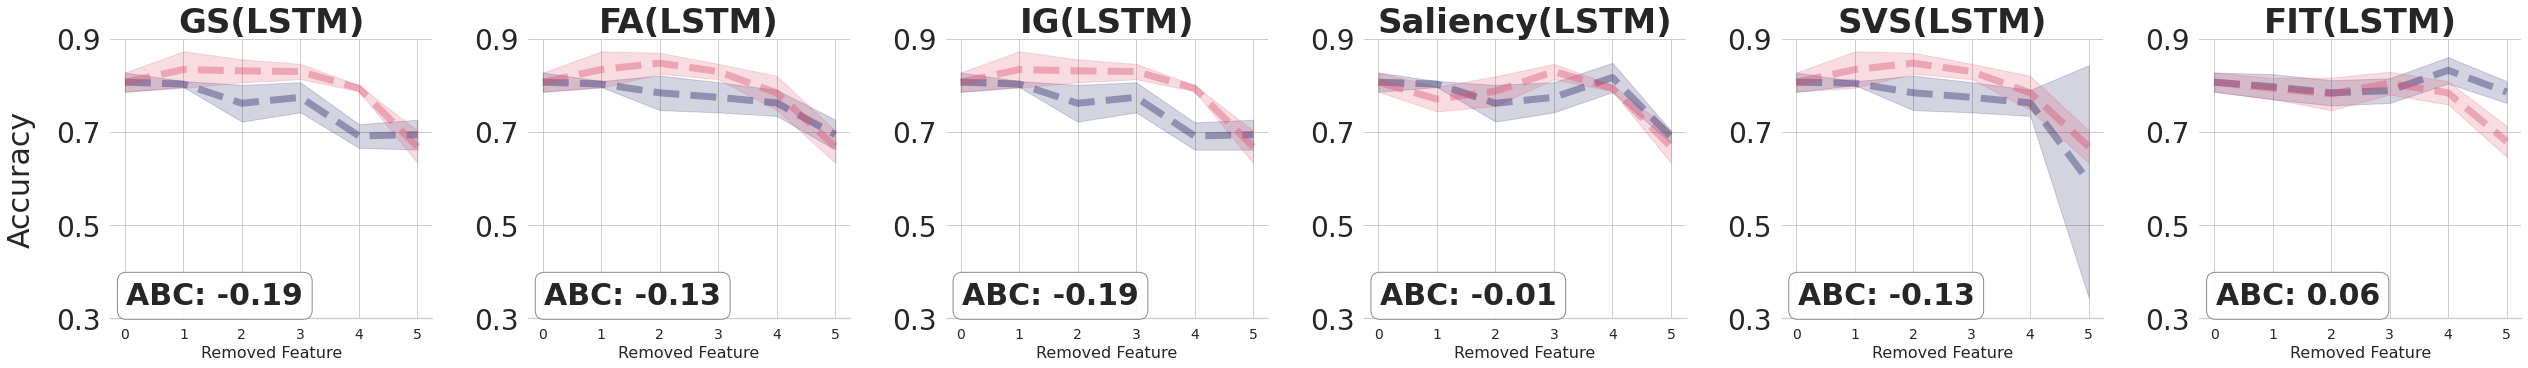

In [14]:
fig, axes = plt.subplots(1, 6, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 34 
linewidth= 7
alpha=0.4

first_idx = 0
second_idx = 1
third_idx = 2
fourth_idx = 3
fifth_idx = 4
sixth_idx = 11

sns.lineplot(data=ms_results_dict[first_idx][0][(ms_results_dict[first_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[first_idx][0][(ms_results_dict[first_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[second_idx][0][(ms_results_dict[second_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[second_idx][0][(ms_results_dict[second_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[third_idx][0][(ms_results_dict[third_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[third_idx][0][(ms_results_dict[third_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fourth_idx][0][(ms_results_dict[fourth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fourth_idx][0][(ms_results_dict[fourth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fifth_idx][0][(ms_results_dict[fifth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fifth_idx][0][(ms_results_dict[fifth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[sixth_idx][0][(ms_results_dict[sixth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[sixth_idx][0][(ms_results_dict[sixth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# remove y tick for axes[1]
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])

# remove label
axes[0].set_ylabel('Accuracy', fontsize=30, labelpad=20)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

for i in range(6):
    axes[i].grid(True)
    axes[i].set_xlabel('Removed Feature', fontsize=16)
    # axes[i].legend(title='', loc='lower left', fontsize=12, )
    axes[i].set_ylim(0.3, 0.9)
    axes[i].spines[["top"]].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    # set x ticks
    axes[i].set_xticks([0, 1, 2,3,4,5])

area_between_0 = calculate_area_between_two_lines(ms_results_dict[first_idx][0])
area_between_1 = calculate_area_between_two_lines(ms_results_dict[second_idx][0])
area_between_2 = calculate_area_between_two_lines(ms_results_dict[third_idx][0])
area_between_3 = calculate_area_between_two_lines(ms_results_dict[fourth_idx][0])
area_between_4 = calculate_area_between_two_lines(ms_results_dict[fifth_idx][0])
area_between_5 = calculate_area_between_two_lines(ms_results_dict[sixth_idx][0])

area_between = [area_between_0, area_between_1, area_between_2, area_between_3, area_between_4, area_between_5]

title_lists = ['GS(LSTM)', 'FA(LSTM)','IG(LSTM)','Saliency(LSTM)','SVS(LSTM)', 'FIT(LSTM)', ]

for i in range(6):
    axes[i].set_title(title_lists[i], fontsize=title_font_size, fontweight='bold')
    # remove legend
    axes[i].legend().remove()
    axes[i].annotate(f"ABC: {area_between[i]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=30, fontweight='bold',
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))

    axes[i].set_yticks([0.3, 0.5, 0.7, 0.9], fontsize=22)
    axes[i].set_yticklabels([0.3, 0.5, 0.7, 0.9], fontsize=28)
    axes[i].spines[["top", "right", "left"]].set_visible(False)
plt.tight_layout()
plt.savefig('results/baseline/ms_activity_lstm1_captum.png', dpi=300)

Area between unimportant and important: 0.1314596554850409
Area between unimportant and important: -0.11529162889090339
Area between unimportant and important: -0.11498942278634061
Area between unimportant and important: -0.08476881233000899
Area between unimportant and important: 0.04230885463886391
Area between unimportant and important: -0.49425808401329707


/tmp/ipykernel_233118/2387285798.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


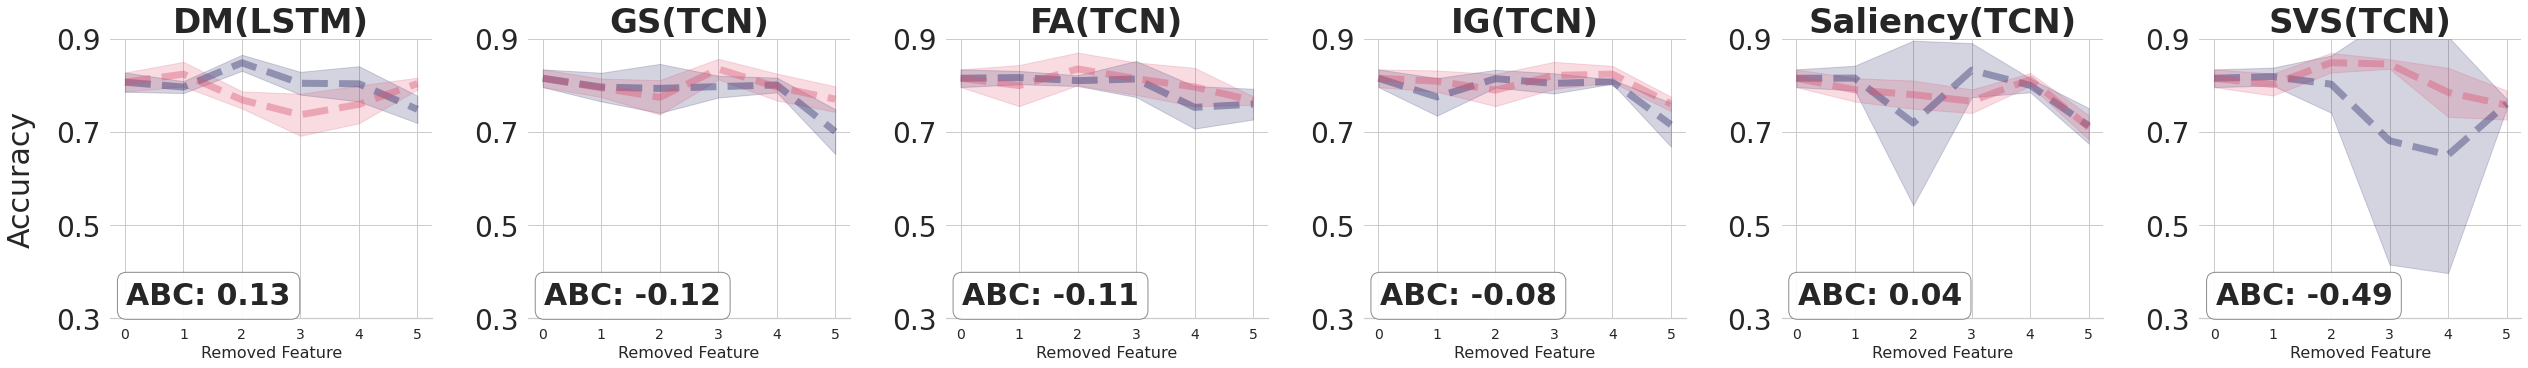

In [15]:
fig, axes = plt.subplots(1, 6, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 34 
linewidth= 7
alpha=0.4

first_idx = 12
second_idx = 5
third_idx = 6
fourth_idx = 7
fifth_idx = 8
sixth_idx = 9

sns.lineplot(data=ms_results_dict[first_idx][0][(ms_results_dict[first_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[first_idx][0][(ms_results_dict[first_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[second_idx][0][(ms_results_dict[second_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[second_idx][0][(ms_results_dict[second_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[third_idx][0][(ms_results_dict[third_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[third_idx][0][(ms_results_dict[third_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fourth_idx][0][(ms_results_dict[fourth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fourth_idx][0][(ms_results_dict[fourth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fifth_idx][0][(ms_results_dict[fifth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[fifth_idx][0][(ms_results_dict[fifth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[sixth_idx][0][(ms_results_dict[sixth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[sixth_idx][0][(ms_results_dict[sixth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# remove y tick for axes[1]
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])

# remove label
axes[0].set_ylabel('Accuracy', fontsize=30, labelpad=20)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

for i in range(6):
    axes[i].grid(True)
    axes[i].set_xlabel('Removed Feature', fontsize=16)
    # axes[i].legend(title='', loc='lower left', fontsize=12, )
    axes[i].set_ylim(0.3, 0.9)
    axes[i].spines[["top"]].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    # set x ticks
    axes[i].set_xticks([0, 1, 2,3,4,5])

area_between_0 = calculate_area_between_two_lines(ms_results_dict[first_idx][0])
area_between_1 = calculate_area_between_two_lines(ms_results_dict[second_idx][0])
area_between_2 = calculate_area_between_two_lines(ms_results_dict[third_idx][0])
area_between_3 = calculate_area_between_two_lines(ms_results_dict[fourth_idx][0])
area_between_4 = calculate_area_between_two_lines(ms_results_dict[fifth_idx][0])
area_between_5 = calculate_area_between_two_lines(ms_results_dict[sixth_idx][0])

area_between = [area_between_0, area_between_1, area_between_2, area_between_3, area_between_4, area_between_5]

title_lists = ['DM(LSTM)','GS(TCN)', 'FA(TCN)','IG(TCN)','Saliency(TCN)','SVS(TCN)',  ]

for i in range(6):
    axes[i].set_title(title_lists[i], fontsize=title_font_size, fontweight='bold')
    # remove legend
    axes[i].legend().remove()
    axes[i].annotate(f"ABC: {area_between[i]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=30, fontweight='bold',
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))

    axes[i].set_yticks([0.3, 0.5, 0.7, 0.9], fontsize=22)
    axes[i].set_yticklabels([0.3, 0.5, 0.7, 0.9], fontsize=28)
    axes[i].spines[["top", "right", "left"]].set_visible(False)
plt.tight_layout()
plt.savefig('results/baseline/ms_activity_lstm2_captum.png', dpi=300)

Area between unimportant and important: 0.04548201873677904
Area between unimportant and important: -0.27651858567543064


/tmp/ipykernel_233118/917213252.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


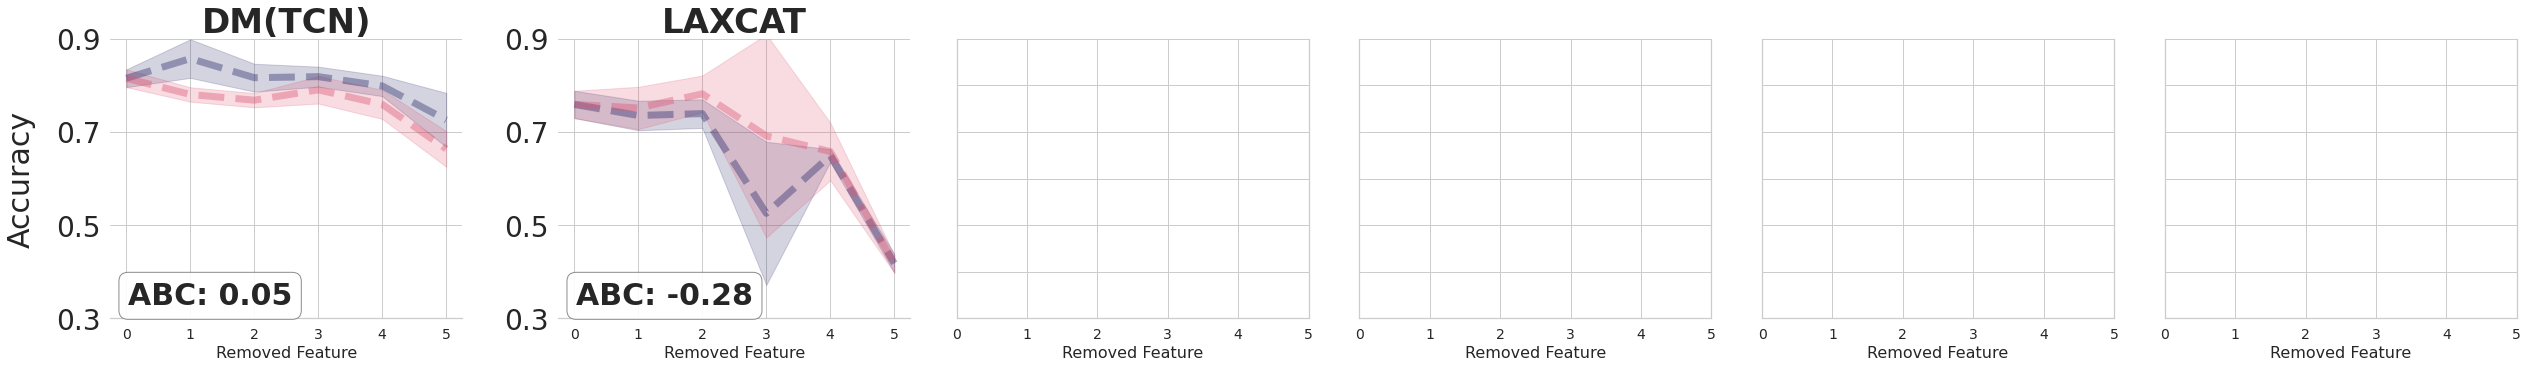

In [16]:
fig, axes = plt.subplots(1, 6, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 34 
linewidth= 7
alpha=0.4

first_idx = 13
second_idx = 10
third_idx = 6
fourth_idx = 7
fifth_idx = 8
sixth_idx = 9

sns.lineplot(data=ms_results_dict[first_idx][0][(ms_results_dict[first_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[first_idx][0][(ms_results_dict[first_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[second_idx][0][(ms_results_dict[second_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
sns.lineplot(data=ms_results_dict[second_idx][0][(ms_results_dict[second_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[third_idx][0][(ms_results_dict[third_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy", 
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[third_idx][0][(ms_results_dict[third_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy", 
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[fourth_idx][0][(ms_results_dict[fourth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[fourth_idx][0][(ms_results_dict[fourth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[fifth_idx][0][(ms_results_dict[fifth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[fifth_idx][0][(ms_results_dict[fifth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[4], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[sixth_idx][0][(ms_results_dict[sixth_idx][0]['exp_type'].isin(['unimportant','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# sns.lineplot(data=ms_results_dict[sixth_idx][0][(ms_results_dict[sixth_idx][0]['exp_type'].isin(['important','base'])) ], x="feature_order", y="test_accuracy",
#             errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[5], alpha=alpha,linewidth=linewidth)
# remove y tick for axes[1]
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])
axes[4].set_yticklabels([])
axes[5].set_yticklabels([])

# remove label
axes[0].set_ylabel('Accuracy', fontsize=30, labelpad=20)
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')
axes[5].set_ylabel('')

for i in range(6):
    axes[i].grid(True)
    axes[i].set_xlabel('Removed Feature', fontsize=16)
    # axes[i].legend(title='', loc='lower left', fontsize=12, )
    axes[i].set_ylim(0.3, 0.9)
    axes[i].spines[["top"]].set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    # set x ticks
    axes[i].set_xticks([0, 1, 2,3,4,5])

area_between_0 = calculate_area_between_two_lines(ms_results_dict[first_idx][0])
area_between_1 = calculate_area_between_two_lines(ms_results_dict[second_idx][0])
# area_between_2 = calculate_area_between_two_lines(ms_results_dict[third_idx][0])
# area_between_3 = calculate_area_between_two_lines(ms_results_dict[fourth_idx][0])
# area_between_4 = calculate_area_between_two_lines(ms_results_dict[fifth_idx][0])
# area_between_5 = calculate_area_between_two_lines(ms_results_dict[sixth_idx][0])

area_between = [area_between_0, area_between_1, area_between_2, area_between_3, area_between_4, area_between_5]

title_lists = ['DM(TCN)','LAXCAT', 'FA(TCN)','IG(TCN)','Saliency(TCN)','SVS(TCN)',  ]

for i in range(2):
    axes[i].set_title(title_lists[i], fontsize=title_font_size, fontweight='bold')
    # remove legend
    axes[i].legend().remove()
    axes[i].annotate(f"ABC: {area_between[i]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=30, fontweight='bold',
                    bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))

    axes[i].set_yticks([0.3, 0.5, 0.7, 0.9], fontsize=22)
    axes[i].set_yticklabels([0.3, 0.5, 0.7, 0.9], fontsize=28)
    axes[i].spines[["top", "right", "left"]].set_visible(False)
plt.tight_layout()
plt.savefig('results/baseline/ms_activity_lstm3_captum.png', dpi=300)